In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Quickly draw the zeroshot results
The final model that fine-tuned on the training set is used to test on the test cores (i.e., case study).

In [2]:
measurement_df = pd.read_csv('../data/legacy/spe+bulk_dataset_20220629.csv', index_col=0)
baseline_df = pd.read_csv('../data/legacy/predict_20220629.csv', index_col=0)
max_df = pd.read_csv(f'../results/zeroshot_case.csv', index_col=0)

cores = ['SO264-69-2', 'LV28-44-3-n', 'PS75-056-1']

20250422


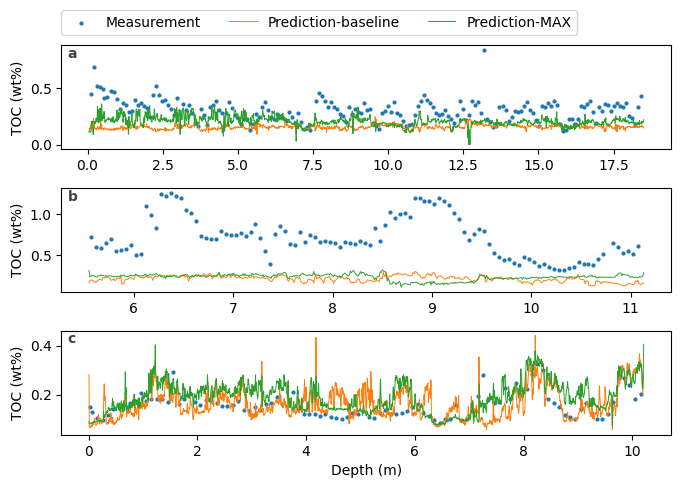

In [3]:
measurement = 'TOC'


fig, axes = plt.subplots(3, 1, figsize=(7, 5))

for core, ax, no in zip(cores, axes, ['a', 'b', 'c']):
    me = measurement_df[measurement_df.core == core]
    bs = baseline_df[baseline_df.core == core]
    max = max_df[max_df.core == core]

    ax.scatter(
        me['mid_depth_mm']*.001, 
        me['{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        bs['composite_depth_mm']*.001, 
        bs['{} prediction (wt%)'.format(measurement)],
        linewidth=.7,
         c='C1', label='Prediction-baseline')
    
    ax.plot(
        max['composite_depth_mm']*.001, 
        max['{} prediction (wt%)'.format(measurement)],
        linewidth=.7,
        c='C2', label='Prediction-MAX')

    ax.set_ylabel('TOC (wt%)')
    ax.text(
        .01, .88, no, c='#424242',
        fontweight = 'bold', transform=ax.transAxes
    )
        

axes[0].legend(loc=(0, 1.1), ncol=3)
axes[2].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.tight_layout()
#fig.savefig('results/prediction_case_{}_{}.png'.format(measurement, date))
print(date)

20250422


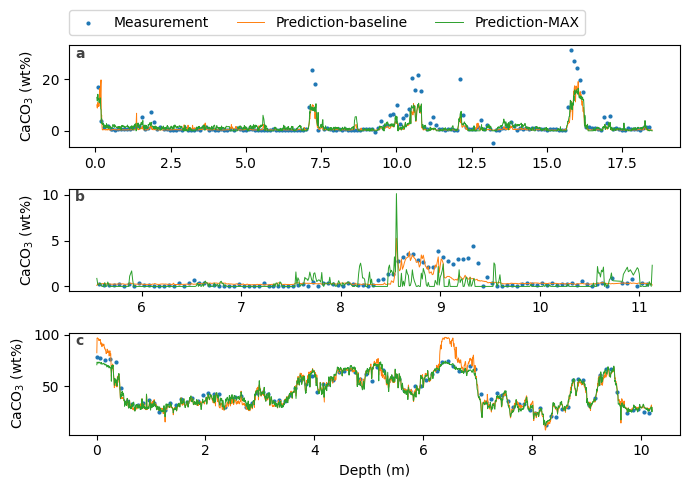

In [4]:
measurement = 'CaCO3'


fig, axes = plt.subplots(3, 1, figsize=(7, 5))

for core, ax, no in zip(cores, axes, ['a', 'b', 'c']):
    me = measurement_df[measurement_df.core == core]
    bs = baseline_df[baseline_df.core == core]
    max = max_df[max_df.core == core]

    ax.scatter(
        me['mid_depth_mm']*.001, 
        me['{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        bs['composite_depth_mm']*.001, 
        bs['{} prediction (wt%)'.format(measurement)],
        linewidth=.7,
         c='C1', label='Prediction-baseline')
    
    ax.plot(
        max['composite_depth_mm']*.001, 
        max['{} prediction (wt%)'.format(measurement)],
        linewidth=.7,
        c='C2', label='Prediction-MAX')

    ax.set_ylabel('CaCO$_3$ (wt%)')
    ax.text(
        .01, .88, no, c='#424242',
        fontweight = 'bold', transform=ax.transAxes
    )
        

axes[0].legend(loc=(0, 1.1), ncol=3)
axes[2].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.tight_layout()
#fig.savefig('results/prediction_case_{}_{}.png'.format(measurement, date))
print(date)

The plots generally fit the overal statisitics of the test set.  The R${^2}$ values are listed below.

|Attribute |    MAX   | Baseline |
|----------|----------|----------|
| CaCO3    |  0.945   |   0.31   |
| TOC      |  0.018   |  -0.96   |

# Re-calculate the baseline's $R^{2}$ in the case study

In [5]:
# spe+bulk_dataset_20220629.csv
me.head()

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.596000,0.150502,78.870,PS75-056-1,15.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.457088,0.129249,77.889,PS75-056-1,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.124211,0.103419,75.332,PS75-056-1,155.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.276967,0.095119,76.673,PS75-056-1,255.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.877704,0.117070,73.165,PS75-056-1,355.0


In [6]:
# baseline's prediction: predict_20220629.csv
bs.head()

,core,composite_depth_mm,section_depth_mm,filename,section,CaCO3 prediction (wt%),TOC prediction (wt%)
composite_id,,,,,,,
PS75-056-1_00005,PS75-056-1,5,5,PS75-056-1_0000 5.0mm 10s 10kV 150uA No-F...,0,82.591130,0.281550
PS75-056-1_00010,PS75-056-1,10,10,PS75-056-1_0000 10.0mm 10s 10kV 150uA No-F...,0,96.924721,0.073264
PS75-056-1_00015,PS75-056-1,15,15,PS75-056-1_0000 15.0mm 10s 10kV 150uA No-F...,0,96.470259,0.066075
PS75-056-1_00020,PS75-056-1,20,20,PS75-056-1_0000 20.0mm 10s 10kV 150uA No-F...,0,96.994862,0.066466
PS75-056-1_00025,PS75-056-1,25,25,PS75-056-1_0000 25.0mm 10s 10kV 150uA No-F...,0,96.493168,0.067207


In [7]:
# MAX's prediction: zeroshot_case.csv 
max.head()

,dirname,composite_id,cps,core,composite_depth_mm,section_depth_mm,filename,section,CaCO3 prediction (wt%),TOC prediction (wt%)
0,0.csv,PS75-056-1_00005,126814,PS75-056-1,5,5,PS75-056-1_0000 5.0mm 10s 10kV 150uA No-F...,0,70.94651,0.091134
1,1.csv,PS75-056-1_00010,170569,PS75-056-1,10,10,PS75-056-1_0000 10.0mm 10s 10kV 150uA No-F...,0,73.59292,0.081840
2,2.csv,PS75-056-1_00015,175200,PS75-056-1,15,15,PS75-056-1_0000 15.0mm 10s 10kV 150uA No-F...,0,73.12874,0.082078
3,3.csv,PS75-056-1_00020,175607,PS75-056-1,20,20,PS75-056-1_0000 20.0mm 10s 10kV 150uA No-F...,0,73.11685,0.081893
4,4.csv,PS75-056-1_00025,176768,PS75-056-1,25,25,PS75-056-1_0000 25.0mm 10s 10kV 150uA No-F...,0,72.48828,0.082037


In [8]:
# we modify the mid_depth_mm to composite_depth_mm by substracting 5
# and convert to int.
# Because the rest datasets don't have this addition in 5 mm during data processing
measurement_df['composite_depth_mm'] = (measurement_df['mid_depth_mm']-5).astype(int)
measurement_df["CaCO3_me"] = measurement_df["CaCO3%"]
measurement_df["TOC_me"] = measurement_df["TOC%"]
measurement_df = measurement_df[["core", "composite_depth_mm", "CaCO3_me", "TOC_me"]].copy()
measurement_df

,core,composite_depth_mm,CaCO3_me,TOC_me
0,SO264-64-1,110,17.898887,0.394127
1,SO264-64-1,210,13.632300,0.611208
2,SO264-64-1,300,1.559822,0.523402
3,SO264-64-1,1010,0.746802,0.472551
4,SO264-64-1,1810,2.210866,0.312852
...,...,...,...,...
288,LV28-44-3-n,10870,0.400000,0.592500
289,LV28-44-3-n,10920,0.820000,0.517500
290,LV28-44-3-n,10970,0.000000,0.552000
291,LV28-44-3-n,11020,0.390000,0.507500


In [9]:
baseline_df["CaCO3_bs"] = baseline_df["CaCO3 prediction (wt%)"]
baseline_df["TOC_bs"] = baseline_df["TOC prediction (wt%)"]
baseline_df = baseline_df[["core", "composite_depth_mm", "CaCO3_bs", "TOC_bs"]].copy()
baseline_df

,core,composite_depth_mm,CaCO3_bs,TOC_bs
composite_id,,,,
SO264-09-2_00010,SO264-09-2,10,47.403444,0.306562
SO264-09-2_00020,SO264-09-2,20,55.504511,0.295711
SO264-09-2_00030,SO264-09-2,30,69.122569,0.264513
SO264-09-2_00040,SO264-09-2,40,71.795426,0.251622
SO264-09-2_00050,SO264-09-2,50,76.453376,0.234564
...,...,...,...,...
SO264-69-2_18460,SO264-69-2,18460,0.372473,0.161074
SO264-69-2_18470,SO264-69-2,18470,0.363064,0.166423
SO264-69-2_18480,SO264-69-2,18480,0.288082,0.158389


In [10]:
max_df["CaCO3_max"] = max_df["CaCO3 prediction (wt%)"]
max_df["TOC_max"] = max_df["TOC prediction (wt%)"]
max_df = max_df[["core", "composite_depth_mm", "CaCO3_max", "TOC_max"]].copy()
max_df

,core,composite_depth_mm,CaCO3_max,TOC_max
0,PS75-056-1,5,70.946510,0.091134
1,PS75-056-1,10,73.592920,0.081840
2,PS75-056-1,15,73.128740,0.082078
3,PS75-056-1,20,73.116850,0.081893
4,PS75-056-1,25,72.488280,0.082037
...,...,...,...,...
4612,SO264-69-2,18460,0.205097,0.190655
4613,SO264-69-2,18470,0.070252,0.196704
4614,SO264-69-2,18480,0.000000,0.202893
4615,SO264-69-2,18490,0.000000,0.198812


In [ ]:
# compbine the three dataframes using the core and composite_depth_mm
merge_df = pd.DataFrame()

for core in cores:
    me = measurement_df[measurement_df.core == core]
    bs = baseline_df[baseline_df.core == core]
    max = max_df[max_df.core == core]

    tmp = pd.merge(me, bs, on=['core', 'composite_depth_mm'], how='inner')
    tmp = pd.merge(tmp, max, on=['core', 'composite_depth_mm'], how='inner')
    merge_df = pd.concat([merge_df, tmp])

merge_df.to_csv(f'../results/compare_predictions_case.csv')

In [12]:
# calculate the MSE between the measurement and the prediction
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


rmse_dict = {}
for target in ['CaCO3', 'TOC']:
    X = merge_df[~merge_df[f"{target}_me"].isna()]
    print(target)
    print(f"N: {len(X)}")
    for pred in ['bs', 'max']:
        rmse_value = rmse(X[f"{target}_{pred}"], X[f"{target}_me"])
        rmse_dict[f"{target}_{pred}"] = rmse_value
        print(f'RMSE between measurement and {pred}: {rmse_value:.3f}')
    
    rmse_diff = (rmse_dict[f"{target}_max"] - rmse_dict[f"{target}_bs"]) / rmse_dict[f"{target}_bs"] * 100
    print(f'RMSE difference between MAX and baseline: {rmse_diff:.1f}%')
    print("---------------------------------")


CaCO3
N: 393
RMSE between measurement and bs: 4.326
RMSE between measurement and max: 3.463
RMSE difference between MAX and baseline: -20.0%
---------------------------------
TOC
N: 393
RMSE between measurement and bs: 0.316
RMSE between measurement and max: 0.309
RMSE difference between MAX and baseline: -2.2%
---------------------------------


## Double check the baseline
The baseline (Lee et al., 2022) only used SO264-69-2 & LV28-44-3-n, so just incase, let's check whether the rmse of these two cores are the same as the baseline. It is compared with `build_models_11.ipynb` in CaCO3_NWP folder.


In [16]:
cores_bs = ['SO264-69-2', 'LV28-44-3-n']

base_df = merge_df[merge_df.core.isin(cores_bs)].copy()
rmse_dict = {}
for target in ['CaCO3', 'TOC']:
    X = base_df[~base_df[f"{target}_me"].isna()]
    print(target)
    print(f"N: {len(X)}")
    rmse_value = rmse(X[f"{target}_bs"], X[f"{target}_me"])
    print(f'RMSE between measurement and bs: {rmse_value:.3f}')
    print("--------------------------------")


CaCO3
N: 290
RMSE between measurement and bs: 2.884
--------------------------------
TOC
N: 290
RMSE between measurement and bs: 0.366
--------------------------------


Okay, the values match. I'll use the decreased rmse between the baseline and MAX to discuss.

# Demo predictions in a core

20250422


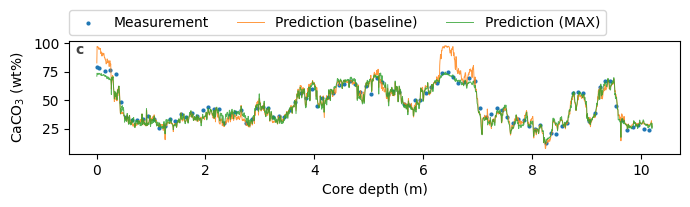

In [28]:
measurement = 'CaCO3'
core = 'PS75-056-1'

fig, ax = plt.subplots(1, 1, figsize=(7, 2.2))

me = measurement_df[measurement_df.core == core]
bs = baseline_df[baseline_df.core == core]
max = max_df[max_df.core == core]

ax.scatter(
    me['composite_depth_mm']*.001, 
    me['{}_me'.format(measurement)], 
    label='Measurement', s=4)
    
ax.plot(
    bs['composite_depth_mm']*.001, 
    bs['{}_bs'.format(measurement)],
    linewidth=.7, alpha=.8,
    c='C1', label='Prediction (baseline)')

ax.plot(
    max['composite_depth_mm']*.001, 
    max['{}_max'.format(measurement)],
    linewidth=.7, alpha=.8,
    c='C2', label='Prediction (MAX)')

ax.set_ylabel('CaCO$_3$ (wt%)')
ax.text(
    .01, .88, no, c='#424242',
    fontweight = 'bold', transform=ax.transAxes
)
        

ax.legend(loc=(0, 1.05), ncol=3)
ax.set_xlabel('Core depth (m)')
fig.tight_layout()
fig.savefig('../results/predictions_case_{}_{}.png'.format(core, date))
print(date)